# Overview: First look on datasets

This notebook contains overview information about replication datasets.

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd

# plot style
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})

In [228]:
# doi, total number of comments, total number of dependencies, total size, list of all files
df = pd.read_csv("run_log_st.csv", delimiter='\t', \
                 names=["doi", "comments_no", "dependen_no", "list_of_all", "total_size"])

In [229]:
df.head()

,doi,comments_no,dependen_no,list_of_all,total_size
0,doi:10.7910/DVN/BPON3K,29,16,fig_6_nominations.R;fig_13_plot_loyalty_df_pct...,2623592
1,doi:10.7910/DVN/JXXNDO,140,0,wgi_GE_2013.csv;WGI_conv.R;wgi_RoL_2013.csv;wg...,1402198
2,doi:10.7910/DVN/NVRBC9,225,18,Lueders_et al_2017_driverslicenses_replication...,451812
3,doi:10.7910/DVN/FXKA3J,2,0,Tweet.R,1669
4,doi:10.7910/DVN/WCTILJ,21,2,Dataset.tab;Script.R,28478


In [230]:
len(df)

1995

# Convert file size to MB

In [231]:
df['sizeMB']=df['total_size']/1000000
df['sizeMB']=df['sizeMB'].round(2)

# Find number of files

In [232]:
def count_files_no(el):
    temp = el.split(";")
    return len(temp)

df['files_count']=df["list_of_all"].apply(count_files_no)

# Check if files contain readme or instructions

In [233]:
def contain_docs(el):
    temp = el.lower()
    if "read" in temp:
        return 1
    if "instruction" in temp:
        return 1
    if "docum" in temp: # add replication
        return 1
    if "docs" in temp:
        return 1
    return 0

df['docs']=df["list_of_all"].apply(contain_docs)

# Check if there is a testing script

In [234]:
def contain_testing(el):
    temp = el.lower()
    if "test" in temp:
        return 1
    return 0

df['test']=df["list_of_all"].apply(contain_testing)

# Check if file names contain space

In [235]:
def contain_space(el):
    if " " in el:
        return 1
    return 0

df['space']=df["list_of_all"].apply(contain_space)

# Contain other code

In [236]:
def contain_code(el):
    "checks if dataset contains other code"
    temp = el.lower()
    if ".do" in temp:
        return 1
    if ".py" in temp:
        return 1
    if ".java" in temp:
        return 1
    if ".cpp" in temp:
        return 1
    if ".m" in temp:
        return 1
    if ".sas" in temp:
        return 1
    return 0

df['code']=df["list_of_all"].apply(contain_code)

# Average length of file name

In [237]:
def file_name_len_old(el):
    "length of file name including extension"
    a = len(el) # full length
    b = el.count(";")
    return (a-b)/(b+1)

def file_name_len(el):
    l = el.split(';')
    names = [el1.split(".")[0] for el1 in l]
    total_avg = sum( map(len, names) )*1. / len(names)
    return round(total_avg, 2)

df['avg_file_len']=df["list_of_all"].apply(file_name_len)

In [238]:
df.head()

,doi,comments_no,dependen_no,list_of_all,total_size,sizeMB,files_count,docs,test,space,code,avg_file_len
0,doi:10.7910/DVN/BPON3K,29,16,fig_6_nominations.R;fig_13_plot_loyalty_df_pct...,2623592,2.62,34,1,1,0,0,24.03
1,doi:10.7910/DVN/JXXNDO,140,0,wgi_GE_2013.csv;WGI_conv.R;wgi_RoL_2013.csv;wg...,1402198,1.40,11,1,0,0,0,12.73
2,doi:10.7910/DVN/NVRBC9,225,18,Lueders_et al_2017_driverslicenses_replication...,451812,0.45,3,0,0,1,0,37.67
3,doi:10.7910/DVN/FXKA3J,2,0,Tweet.R,1669,0.00,1,0,0,0,0,5.00
4,doi:10.7910/DVN/WCTILJ,21,2,Dataset.tab;Script.R,28478,0.03,2,0,0,0,0,6.50


In [260]:
# check if test is there
df.iloc[0]['list_of_all']

'fig_6_nominations.R;fig_13_plot_loyalty_df_pct.R;tab_1_summary_stats.R;fig_2_fig_4_party_switching.R;fig_12_historical_trend.R;tab_5_LATE_change_attrition.R;fig_10_effect_of_winning_on_gov.R;fig_9_effect_of_winning_on_state_congress.R;tab_2_balance_test_before_court_decision.R;tab_8_campaign_donations.R;tab_14_LATE_placebo.R;codebook.pdf;fig_5_tab_7_rd_robust_estimations.R;tab_12_LATE_de.R;README.txt;tab_6_LATE_df.R;tab_10_LATE_re_nominations.R;campaign_contributions.RData;tab_3_balance_test_after_court_decision.R;tab_9_LATE_nominations_overall.R;fig_11_rd_placebo.R;complete_dataset.RData;tab_4_LATE_change.R;fig_14_effect_on_individual_parties.R;fig_8_losing_council.R;tab_11_LATE_nominations_diff_party.R;fig_7_party_switching_by_party_VEREADORES.R;disloyalty_scatterplot.RData;tab_15_incumbency_party_switching.R;mayor_vereadores.RData;fig_3_effect_of_winning_on_federal_congress.R;vereadores_figure.RData;tab_13_LATE_gov.R;career.RData'

# Histograms

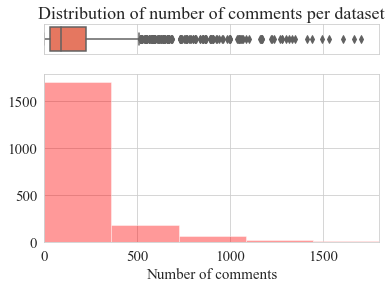

In [239]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["comments_no"], ax=ax_box, palette="Reds")
sns.distplot(df["comments_no"], ax=ax_hist, kde=False, color="r")
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Distribution of number of comments per dataset')
ax_hist.set(xlabel="Number of comments")
#plt.xscale('log')
plt.xlim(0, 1800)
plt.show()

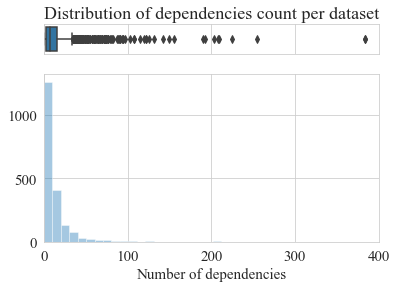

In [240]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["dependen_no"], ax=ax_box)
sns.distplot(df["dependen_no"], ax=ax_hist, kde=False)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Distribution of dependencies count per dataset')
ax_hist.set(xlabel="Number of dependencies")
#plt.xscale('log')
plt.xlim(0, 400)
plt.show()

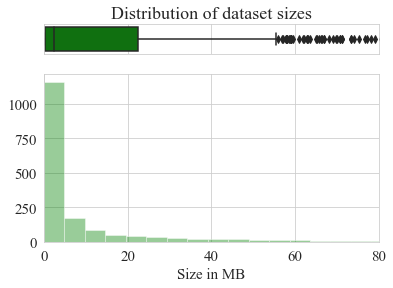

In [241]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["sizeMB"], ax=ax_box, color="g")
sns.distplot(df["sizeMB"], ax=ax_hist, bins=800, kde=False, color="g")
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Distribution of dataset sizes')
ax_hist.set(xlabel="Size in MB")
#plt.xscale('log')
plt.xlim(0, 80)
plt.show()

f.tight_layout()
f.savefig("plots/ds_size.png", dpi=100)

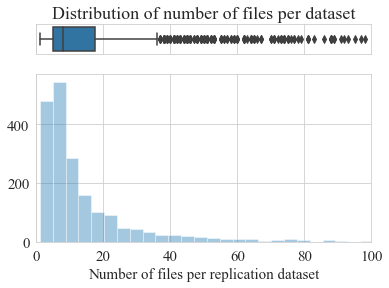

In [242]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["files_count"], ax=ax_box)
sns.distplot(df["files_count"], ax=ax_hist, bins=230, kde=False)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Distribution of number of files per dataset')
ax_hist.set(xlabel="Number of files per replication dataset")
plt.xlim(0, 100)
plt.show()

f.tight_layout()
f.savefig("plots/files_no.png", dpi=100)

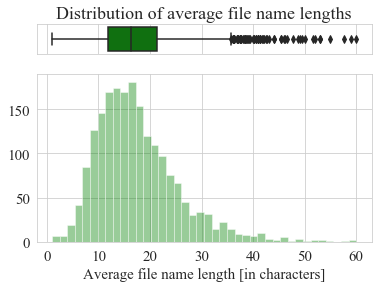

In [243]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(df["avg_file_len"], ax=ax_box, color="g")
sns.distplot(df["avg_file_len"], ax=ax_hist, color="g", bins=40, kde=False)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Distribution of average file name lengths')
ax_hist.set(xlabel="Average file name length [in characters]")
plt.show()
f.tight_layout()
f.savefig("plots/filename_len.png", dpi=100)

# Pies and Bars

Text(0.5,1,'Dataset contains a file that has space in file name')

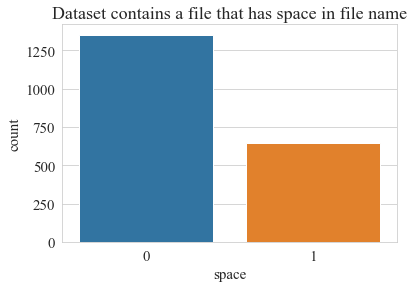

In [244]:
ax = sns.countplot(x="space",  data=df)
ax.set_title("Dataset contains a file that has space in file name")

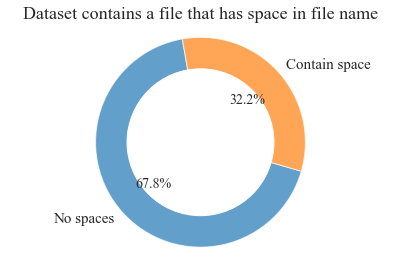

In [256]:
# Pie chart
labels = ['No spaces', 'Contain space']
sizes = [(df['space'] == 0).sum(), (df['space'] == 1).sum()]
#colors = ['#99ff99', '#ff9999']
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=100,  textprops={'fontsize': 14}, wedgeprops={'alpha':0.7})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Dataset contains a file that has space in file name", size=18)
plt.tight_layout()

plt.show()
fig.savefig("plots/space.png", dpi=100)

# Testing script

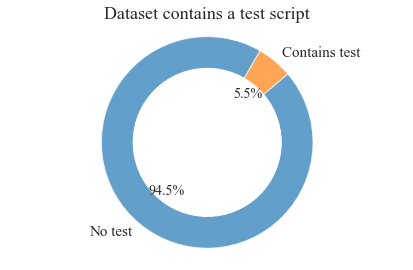

In [246]:
# Pie chart
labels = ['No test', 'Contains test']
sizes = [(df['test'] == 0).sum(), (df['test'] == 1).sum()]
#colors = ['#99ff99', '#ff9999']
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60,  textprops={'fontsize': 14}, wedgeprops={'alpha':0.7})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Dataset contains a test script", size=18)
plt.tight_layout()

plt.show()
fig.savefig("plots/test_script.png", dpi=100)

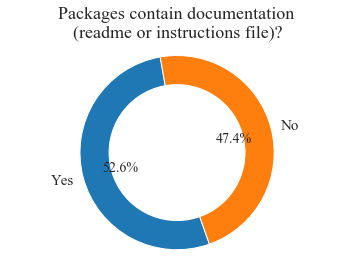

In [247]:
# Pie chart
labels = ['Yes',  'No']
sizes = [(df['docs'] == 1).sum(), (df['docs'] == 0).sum()]
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=100,  textprops={'fontsize': 14})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Packages contain documentation \n(readme or instructions file)?", size=18)
#plt.tight_layout()

plt.show()

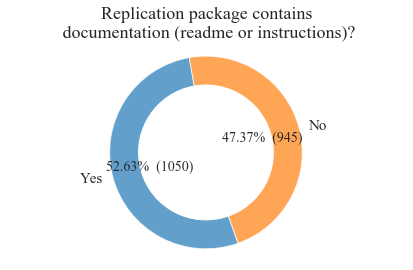

In [248]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Pie chart
labels = ['Yes',  'No']
sizes = [(df['docs'] == 1).sum(), (df['docs'] == 0).sum()]
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=100,  textprops={'fontsize': 14},wedgeprops={'alpha':0.7})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Replication package contains\n documentation (readme or instructions)?", size=18)
plt.tight_layout()

plt.show()
fig.savefig("plots/docs.png", dpi=100)

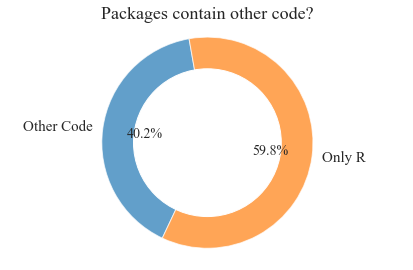

In [249]:
# Pie chart
labels = ['Other Code',  'Only R']
sizes = [(df['code'] == 1).sum(), (df['code'] == 0).sum()]
#colors = ['#ff9999','#99ff99']
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=100,  textprops={'fontsize': 14}, wedgeprops={'alpha':0.7})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Packages contain other code?", size=18)
plt.tight_layout()

plt.show()
fig1.savefig("plots/other_code.png", dpi=100)

# Verify

In [250]:
df.to_csv('overview.csv')

# Random: Dependencies and comments are positively corelated

In [251]:
df.head()

,doi,comments_no,dependen_no,list_of_all,total_size,sizeMB,files_count,docs,test,space,code,avg_file_len
0,doi:10.7910/DVN/BPON3K,29,16,fig_6_nominations.R;fig_13_plot_loyalty_df_pct...,2623592,2.62,34,1,1,0,0,24.03
1,doi:10.7910/DVN/JXXNDO,140,0,wgi_GE_2013.csv;WGI_conv.R;wgi_RoL_2013.csv;wg...,1402198,1.40,11,1,0,0,0,12.73
2,doi:10.7910/DVN/NVRBC9,225,18,Lueders_et al_2017_driverslicenses_replication...,451812,0.45,3,0,0,1,0,37.67
3,doi:10.7910/DVN/FXKA3J,2,0,Tweet.R,1669,0.00,1,0,0,0,0,5.00
4,doi:10.7910/DVN/WCTILJ,21,2,Dataset.tab;Script.R,28478,0.03,2,0,0,0,0,6.50


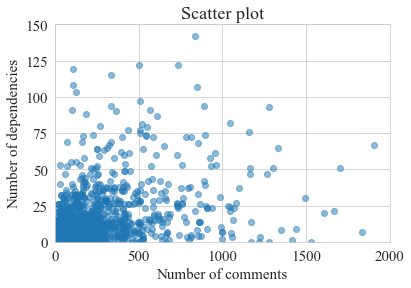

In [252]:
plt.scatter(df.comments_no, df.dependen_no, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Number of comments')
plt.ylabel('Number of dependencies')
plt.xlim(0, 2000)
plt.ylim(0, 150)
plt.show()

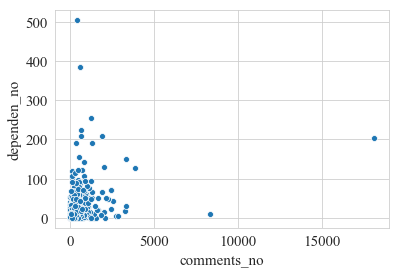

In [253]:
sns.scatterplot(x=df.comments_no, y=df.dependen_no, data=df)

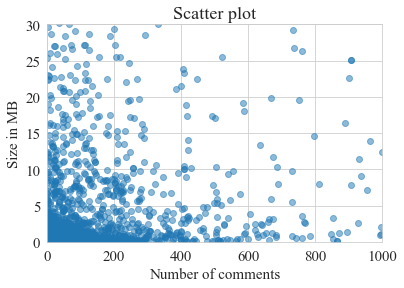

In [254]:
plt.scatter(df.comments_no, df.sizeMB, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Number of comments')
plt.ylabel('Size in MB')
plt.xlim(0, 1000)
plt.ylim(0, 30)
plt.show()

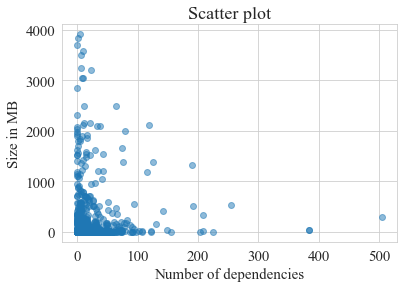

In [255]:
plt.scatter(df.dependen_no, df.sizeMB, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Number of dependencies')
plt.ylabel('Size in MB')
#plt.xlim(0, 20)
#plt.ylim(0, 50)
plt.show()